In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [140]:
df=pd.read_csv("E:\DataScience-data\insurance.csv")


In [141]:
df.shape

(1338, 7)

In [142]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [7]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [8]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [9]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [10]:
df=df.drop_duplicates()

In [11]:
df.shape

(1337, 7)

In [16]:
df["sex"].value_counts()

male      675
female    662
Name: sex, dtype: int64

In [13]:
a=["age","bmi","children","charges"]
b=["sex","smoker","region"]

male      675
female    662
Name: sex, dtype: int64


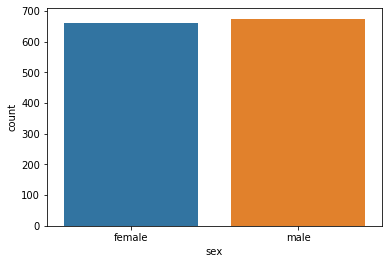

no     1063
yes     274
Name: smoker, dtype: int64


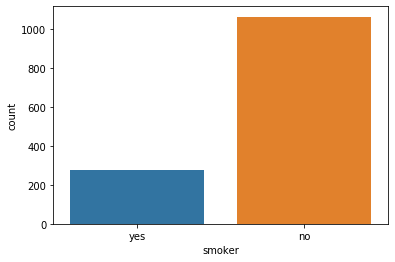

southeast    364
southwest    325
northwest    324
northeast    324
Name: region, dtype: int64


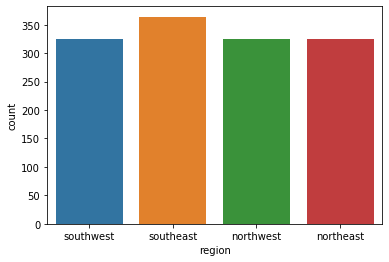

In [18]:
for i in b:
    print(df[i].value_counts())
    sns.countplot(x=i,data=df)
    plt.show()

count    1337.000000
mean       39.222139
std        14.044333
min        18.000000
25%        27.000000
50%        39.000000
75%        51.000000
max        64.000000
Name: age, dtype: float64
0.054780773126998195


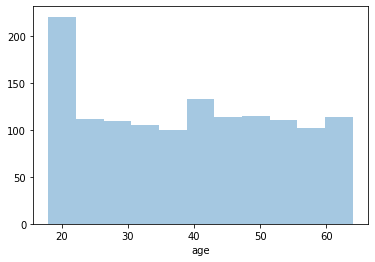

count    1337.000000
mean       30.663452
std         6.100468
min        15.960000
25%        26.290000
50%        30.400000
75%        34.700000
max        53.130000
Name: bmi, dtype: float64
0.28391419385321137


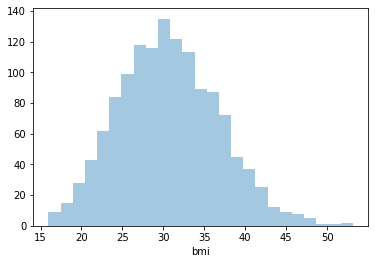

count    1337.000000
mean        1.095737
std         1.205571
min         0.000000
25%         0.000000
50%         1.000000
75%         2.000000
max         5.000000
Name: children, dtype: float64
0.9374206440474123


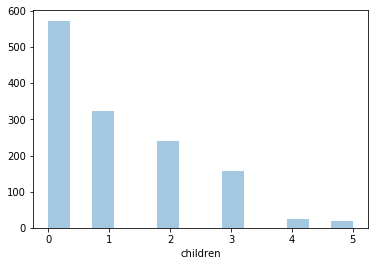

count     1337.000000
mean     13279.121487
std      12110.359656
min       1121.873900
25%       4746.344000
50%       9386.161300
75%      16657.717450
max      63770.428010
Name: charges, dtype: float64
1.5153909108403483


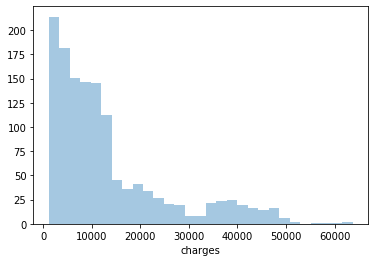

In [21]:
for i in a:
    print(df[i].describe())
    print(df[i].skew())
    sns.distplot(df[i],kde=False)
    plt.show()

          charges       age
charges  1.000000  0.298308
age      0.298308  1.000000


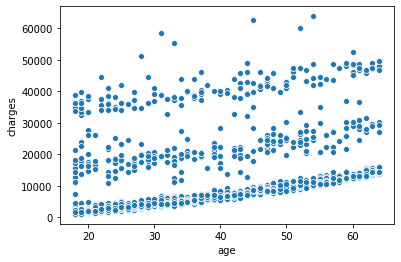

          charges       bmi
charges  1.000000  0.198401
bmi      0.198401  1.000000


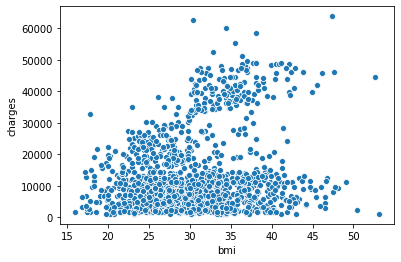

           charges  children
charges   1.000000  0.067389
children  0.067389  1.000000


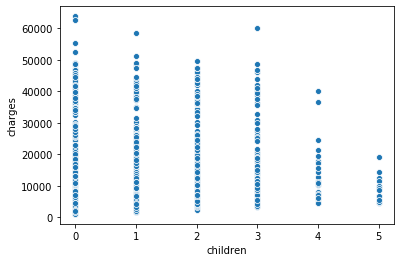

In [23]:
for i in a:
    if i=="charges":
        break
    print(df[["charges",i]].corr())
    sns.scatterplot(x=i,y="charges",data=df)
    plt.show()

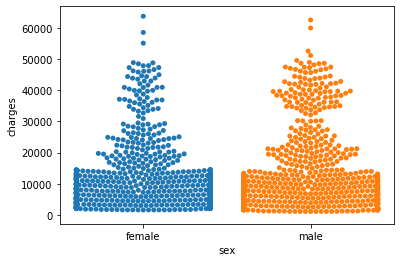

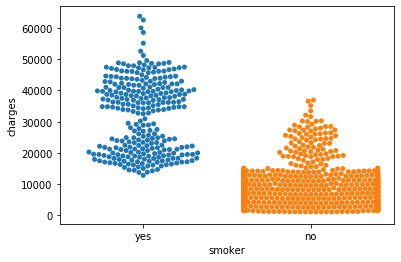

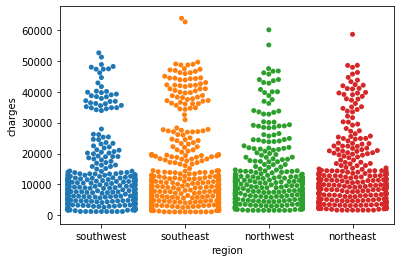

In [24]:
for i in b:
    sns.swarmplot(x=i,y="charges",data=df)
    plt.show()

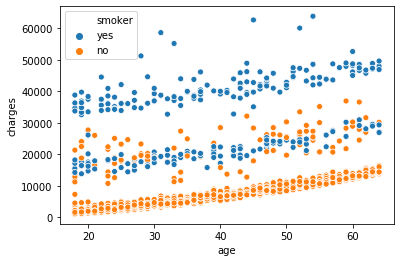

In [25]:
sns.scatterplot(x="age",y="charges",hue="smoker",data=df)
plt.show()

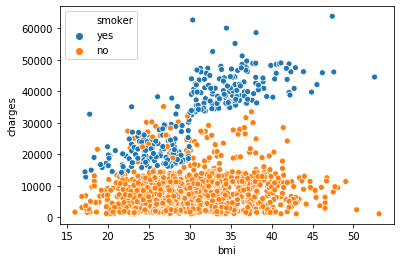

In [27]:
sns.scatterplot(x="bmi",y="charges",hue="smoker",data=df)
plt.show()

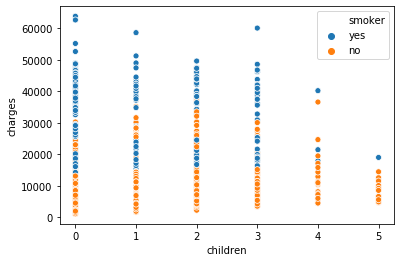

In [28]:
sns.scatterplot(x="children",y="charges",hue="smoker",data=df)
plt.show()

In [88]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [143]:
x=df.drop("charges",axis=1)
y=df["charges"]

In [146]:
x.head()

,age,sex,bmi,children,smoker,region
0,19,female,27.900,0,yes,southwest
1,18,male,33.770,1,no,southeast
2,28,male,33.000,3,no,southeast
3,33,male,22.705,0,no,northwest
4,32,male,28.880,0,no,northwest


In [147]:
from sklearn.preprocessing import LabelEncoder
l1=LabelEncoder()
l2=LabelEncoder()
l3=LabelEncoder()


In [148]:
x["sex"]=l1.fit_transform(x["sex"])
x["smoker"]=l2.fit_transform(x["smoker"])
x["region"]=l3.fit_transform(x["region"])


In [149]:
x=pd.DataFrame(x)

In [150]:
x.head()

,age,sex,bmi,children,smoker,region
0,19,0,27.900,0,1,3
1,18,1,33.770,1,0,2
2,28,1,33.000,3,0,2
3,33,1,22.705,0,0,1
4,32,1,28.880,0,0,1


In [151]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,train_size=0.8)

In [152]:
print(xtrain.shape)
print(ytrain.shape)
print(xtest.shape)
print(ytest.shape)

(1070, 6)
(1070,)
(268, 6)
(268,)


In [153]:
from sklearn.linear_model import LinearRegression
algo=LinearRegression()
algo.fit(xtrain,ytrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [154]:
algo.coef_

array([  250.82360127,  -261.05695536,   335.45602259,   480.72566921,
       24278.721284  ,  -302.66823975])

In [155]:
algo.intercept_

-11760.12209152715

In [156]:
ypred=algo.predict(xtest)




In [157]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

In [158]:
print(mean_absolute_error(ytest,ypred))
print(r2_score(ytest,ypred))

4397.692674442038
0.7148884547845664


In [159]:
import joblib

In [160]:
joblib.dump(algo,r"E:\DataScience-data\abcd.pkl")

['E:\\DataScience-data\\abcd.pkl']

In [161]:
joblib.dump(l1,r"E:\DataScience-data\abcd-l1.pkl")
joblib.dump(l2,r"E:\DataScience-data\abcd-l2.pkl")
joblib.dump(l3,r"E:\DataScience-data\abcd-l3.pkl")

['E:\\DataScience-data\\abcd-l3.pkl']

In [ ]:
#using label encoder
